In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
custom_palette = sns.color_palette("tab10", n_colors=2)

In [3]:
data_path = "./jade_apex_filtered.csv"
n= 10

In [4]:
data_df = pd.read_csv(data_path)
data_df.groupby(["env", "exp", "size"]).count().reset_index()

,env,exp,size,episode_reward_max,episode_reward_min,episode_reward_mean,episodes_this_iter,num_env_steps_sampled,num_env_steps_trained,num_agent_steps_sampled,...,learner_grad_time_ms,learner_grad_throughput,learner_overall_time_ms,learner_overall_throughput,target_net_update_time_ms,episodes_total,training_iteration,time_this_iter_s,time_total_s,buffer
0,Alien,APEX_DDQN_AlienNoFrameskip-v4_DPBER_518437,16,5083,5083,5083,5083,5083,5083,5083,...,5082,5082,5082,5082,5081,5083,5083,5083,5083,5083
1,Amidar,APEX_DDQN_AmidarNoFrameskip-v4_DPBER_518438,16,4852,4852,4852,4852,4852,4852,4852,...,4851,4851,4851,4851,4851,4852,4852,4852,4852,4852
2,Assault,APEX_DDQN_AssaultNoFrameskip-v4_DPBER_518439,16,5222,5222,5222,5223,5223,5223,5223,...,5222,5222,5222,5222,5222,5223,5223,5223,5223,5223
3,Asterix,APEX_DDQN_AsterixNoFrameskip-v4_DPBER_518440,16,4820,4820,4820,4820,4820,4820,4820,...,4819,4819,4819,4819,4818,4820,4820,4820,4820,4820
4,Asteroids,APEX_DDQN_AsteroidsNoFrameskip-v4_DPBER_518441,16,4930,4930,4930,4930,4930,4930,4930,...,4929,4929,4929,4929,4929,4930,4930,4930,4930,4930
5,Atlantis,APEX_DDQN_AtlantisNoFrameskip-v4_DPBER_518442,16,5027,5027,5027,5027,5027,5027,5027,...,5026,5026,5026,5026,5026,5027,5027,5027,5027,5027
6,BankHeist,APEX_DDQN_BankHeistNoFrameskip-v4_DPBER_518443,16,4919,4919,4919,4920,4920,4920,4920,...,4919,4919,4919,4919,4919,4920,4920,4920,4920,4920
7,BattleZone,APEX_DDQN_BattleZoneNoFrameskip-v4_DPBER_518444,16,4670,4670,4670,4671,4671,4671,4671,...,4670,4670,4670,4670,4670,4671,4671,4671,4671,4671
8,BeamRider,APEX_DDQN_BeamRiderNoFrameskip-v4_DPBER_512745,8,9998,9998,9998,9999,9999,9999,9999,...,9998,9998,9998,9998,9998,9999,9999,9999,9999,9999
9,BeamRider,APEX_DDQN_BeamRiderNoFrameskip-v4_DPBER_514027,16,8612,8612,8612,8615,8615,8615,8615,...,8614,8614,8614,8614,8614,8615,8615,8615,8615,8615


In [6]:
data_df = pd.read_csv(data_path)
data_df = data_df[data_df["env"].isin(["BeamRider", "Breakout", "Qbert", "SpaceInvaders"])]
data_df["size"].value_counts()

size
1     39996
8     35072
16    33943
32    18072
Name: count, dtype: int64

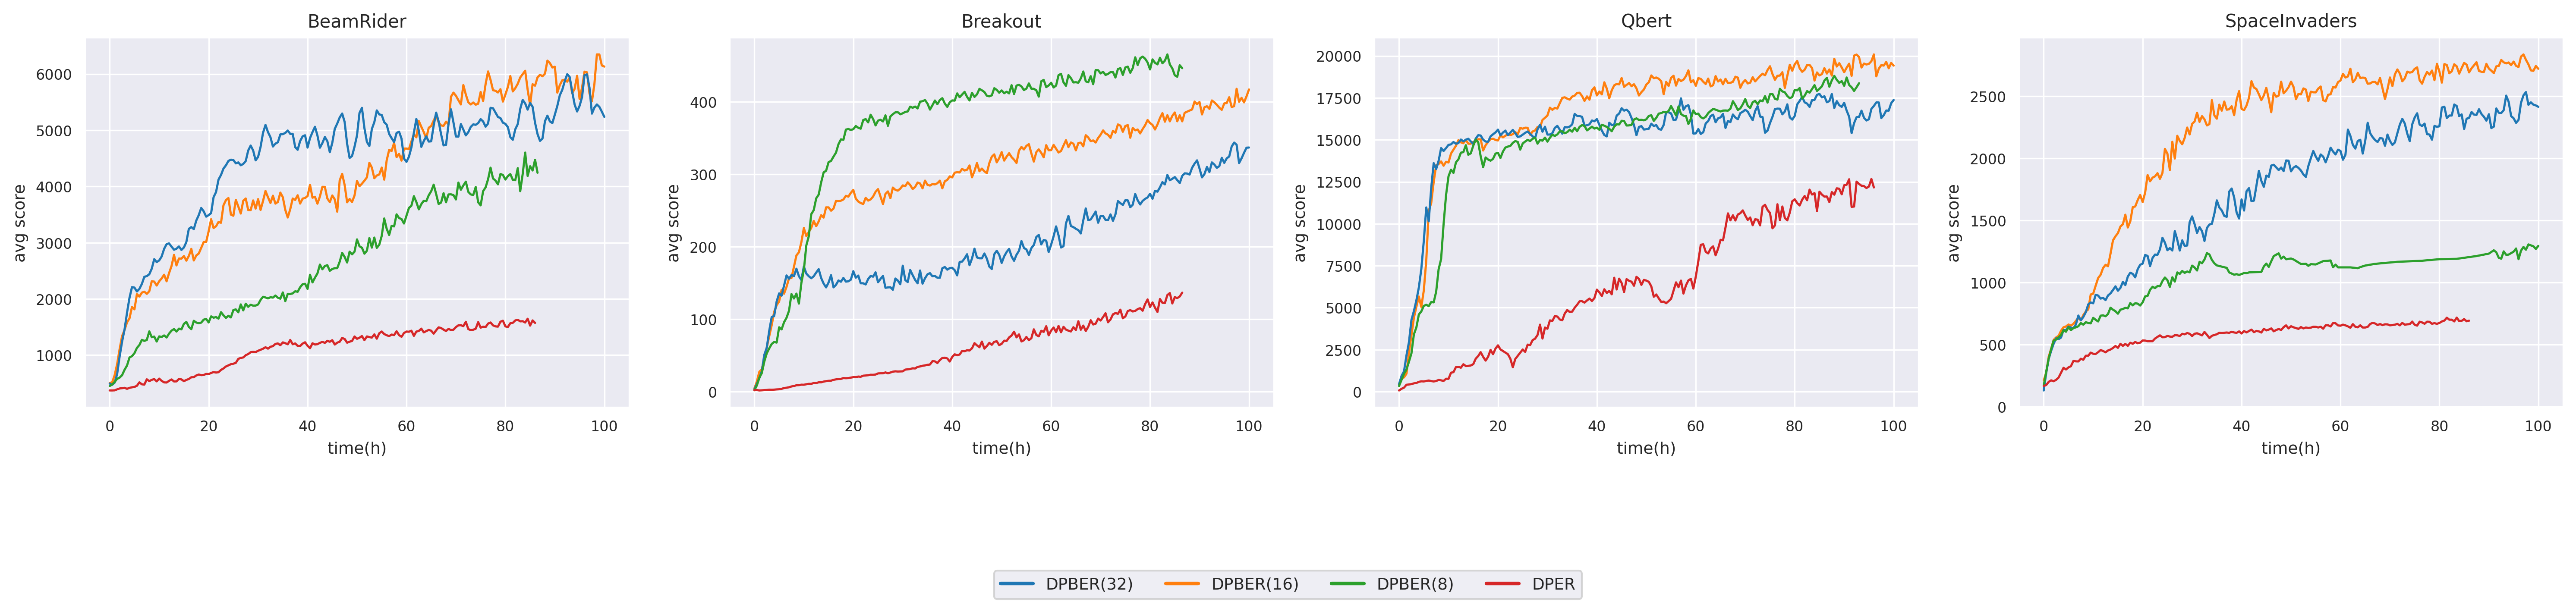

In [9]:
# Filter data
data_df = data_df[data_df["env"].isin(["BeamRider", "Breakout", "Qbert", "SpaceInvaders"])]
data_df = data_df[data_df["size"].isin([1, 8, 16, 32])]
data_df["time(h)"] = data_df["time_total_s"] / 3600
sampler = {env: data_df[data_df['env'] == env] for env in data_df['env'].unique()}
window_size_hours = 0.25

data_df = data_df[data_df["size"].isin([1, 8, 16, 32])]
data_df["time(h)"] = data_df["time_total_s"] / 3600

# Combine buffer and size into a single label
data_df["label"] = data_df.apply(lambda row: 'DPER' if row['buffer'] == 'DPER' else f"DPBER({row['size']})", axis=1)

# Compute rolling mean with the new label
def compute_rolling_mean_with_label(data, window_size=0.5):
    data["time_group"] = (data["time(h)"] // window_size) * window_size
    smoothed_data = data.groupby(["time_group", "label"])[["episode_reward_mean"]].mean().reset_index()
    return smoothed_data

smoothed_sampler = {env: compute_rolling_mean_with_label(data) for env, data in data_df.groupby('env')}

# Create a palette for the combined labels
unique_labels = data_df['label'].unique()
combined_palette = sns.color_palette("tab10", len(unique_labels))
label_palette = dict(zip(unique_labels, combined_palette))

# Plot the data
fig, axes = plt.subplots(1, 4, figsize=(20, 4), dpi=300)
axes = axes.reshape(-1)

for ax_n, env in enumerate(data_df['env'].unique()):
    data_env = smoothed_sampler[env]
    ax = sns.lineplot(x="time_group", y="episode_reward_mean", hue="label", data=data_env, ax=axes[ax_n], palette=label_palette, linewidth=1.2)
    ax.set_title(env, fontsize=10)
    ax.set_xlabel("time(h)", fontsize=9)
    ax.set_ylabel("avg score", fontsize=9)
    ax.xaxis.set_tick_params(labelsize=8)
    ax.yaxis.set_tick_params(labelsize=8)
    ax.get_legend().remove()

for ax_n in range(len(data_df['env'].unique()), len(axes)):
    axes[ax_n].axis('off')

# Create the legend
legend_labels = list(label_palette.keys())
legend_lines = [plt.Line2D([0], [0], color=label_palette[label], lw=2) for label in legend_labels]
fig.legend(legend_lines, legend_labels, loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=len(legend_labels), fontsize=9)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, bottom=0.2)
plt.show()

/tmp/ipykernel_27256/688990681.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["time_group"] = (data["num_env_steps_sampled"] // window_size) * window_size
/tmp/ipykernel_27256/688990681.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["time_group"] = data["time_group"] * 4
/tmp/ipykernel_27256/688990681.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

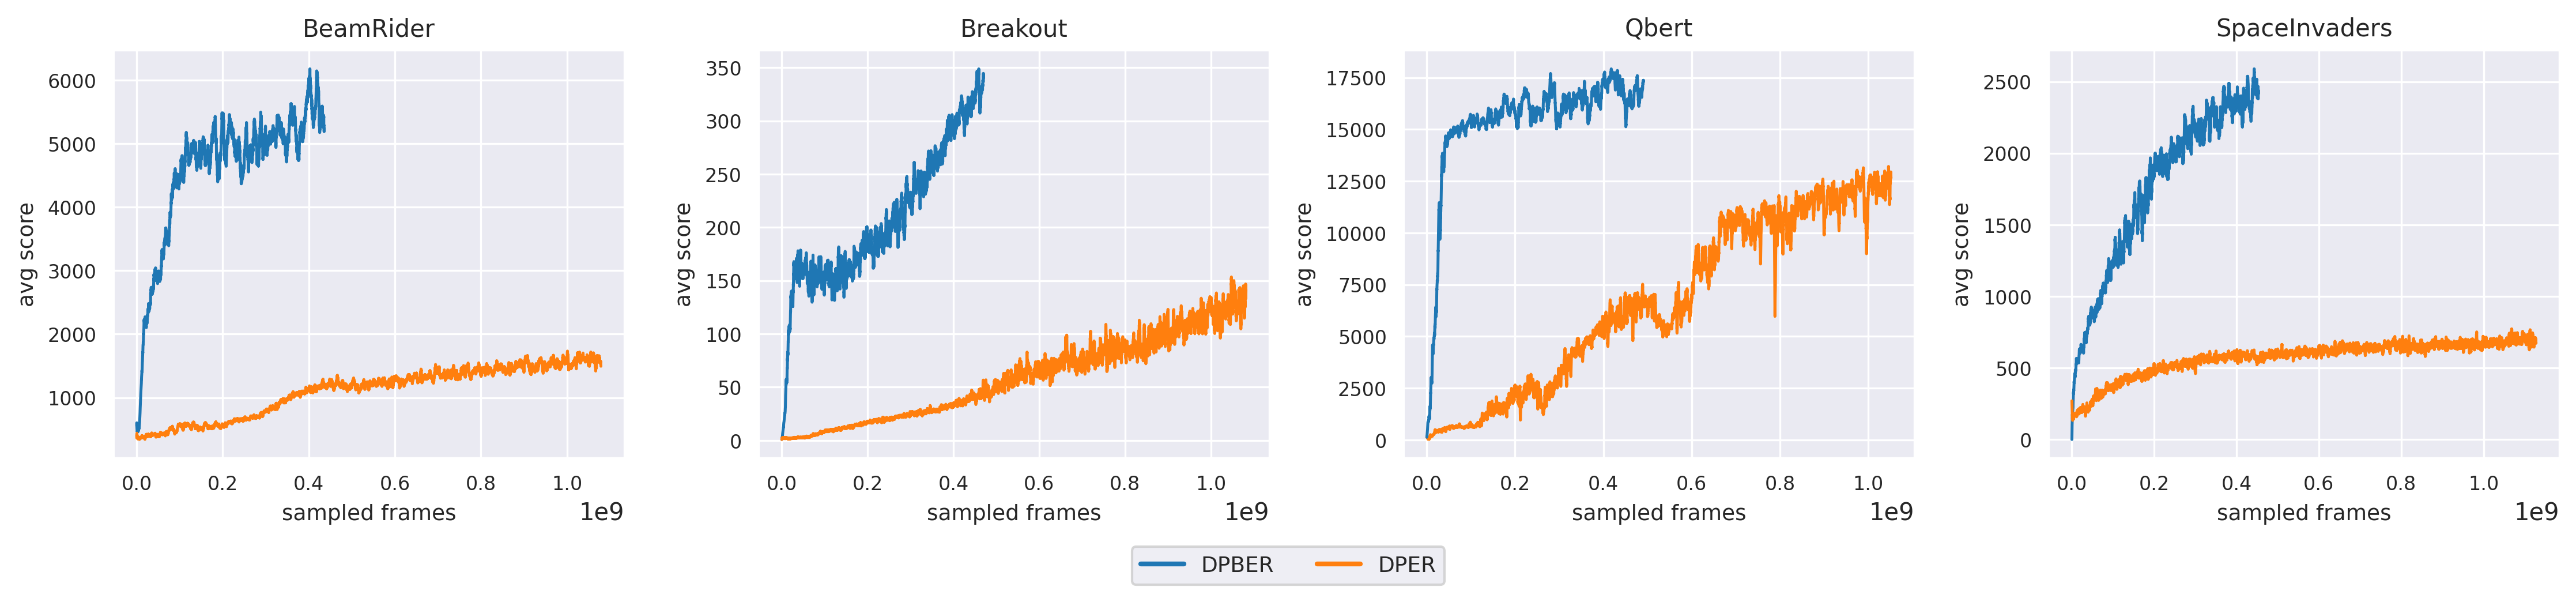

In [23]:
data_df = pd.read_csv(data_path)
data_df = data_df[data_df["env"].isin(["BeamRider", "Breakout", "Qbert", "SpaceInvaders"])]
data_df = data_df[data_df["size"].isin([1, 32])]
# Filter the environments
data_df["time(h)"] = data_df["time_total_s"] / 3600
sampler = {env: data_df[data_df['env'] == env] for env in data_df['env'].unique()}
window_size = 12500

def compute_rolling_mean(data, window_size=0.5):
    data["time_group"] = (data["num_env_steps_sampled"] // window_size) * window_size
    data["time_group"] = data["time_group"] * 4
    smoothed_data = data.groupby(["time_group", "buffer"])[["episode_reward_mean"]].mean().reset_index()
    return smoothed_data

smoothed_sampler = {env: compute_rolling_mean(data) for env, data in sampler.items()}

# Custom palette for the buffers
buffer_palette = {
    'DPBER': sns.color_palette("tab10")[0],
    'DPER': sns.color_palette("tab10")[1]
}

# Create a 6x4 grid for the plots
fig, axes = plt.subplots(1, 4, figsize=(15, 3), dpi=300)
axes = axes.reshape(-1)

# Calculate the rolling mean for each environment and then plot
for ax_n, env in enumerate(data_df['env'].unique()):
    data_env = data_df[data_df['env'] == env]
    smoothed_data_env = compute_rolling_mean(data_env)
    
    ax = sns.lineplot(x="time_group", y="episode_reward_mean", hue="buffer", data=smoothed_data_env, ax=axes[ax_n], palette=buffer_palette, linewidth=1.2)
    ax.set_title(env, fontsize=10)
    ax.set_xlabel("sampled frames", fontsize=9)
    ax.set_ylabel("avg score", fontsize=9)
    ax.xaxis.set_tick_params(labelsize=8)
    ax.yaxis.set_tick_params(labelsize=8)
    
    # Remove the legend from the subplot
    ax.get_legend().remove()

# Hide any unused subplots
for ax_n in range(len(data_df['env'].unique()), len(axes)):
    axes[ax_n].axis('off')

# Create a fixed set of legend labels and their corresponding lines
fixed_legend_labels = ['DPBER', 'DPER']
fixed_legend_lines = [plt.Line2D([0], [0], color=buffer_palette[label], lw=2) for label in fixed_legend_labels]
fig.legend(fixed_legend_lines, fixed_legend_labels, loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=len(fixed_legend_labels), fontsize=9)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, bottom=0.1)
plt.show()

/tmp/ipykernel_27256/679692103.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["time_group"] = (data["num_env_steps_trained"] // window_size) * window_size
/tmp/ipykernel_27256/679692103.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["time_group"] = data["time_group"] * 4
/tmp/ipykernel_27256/679692103.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

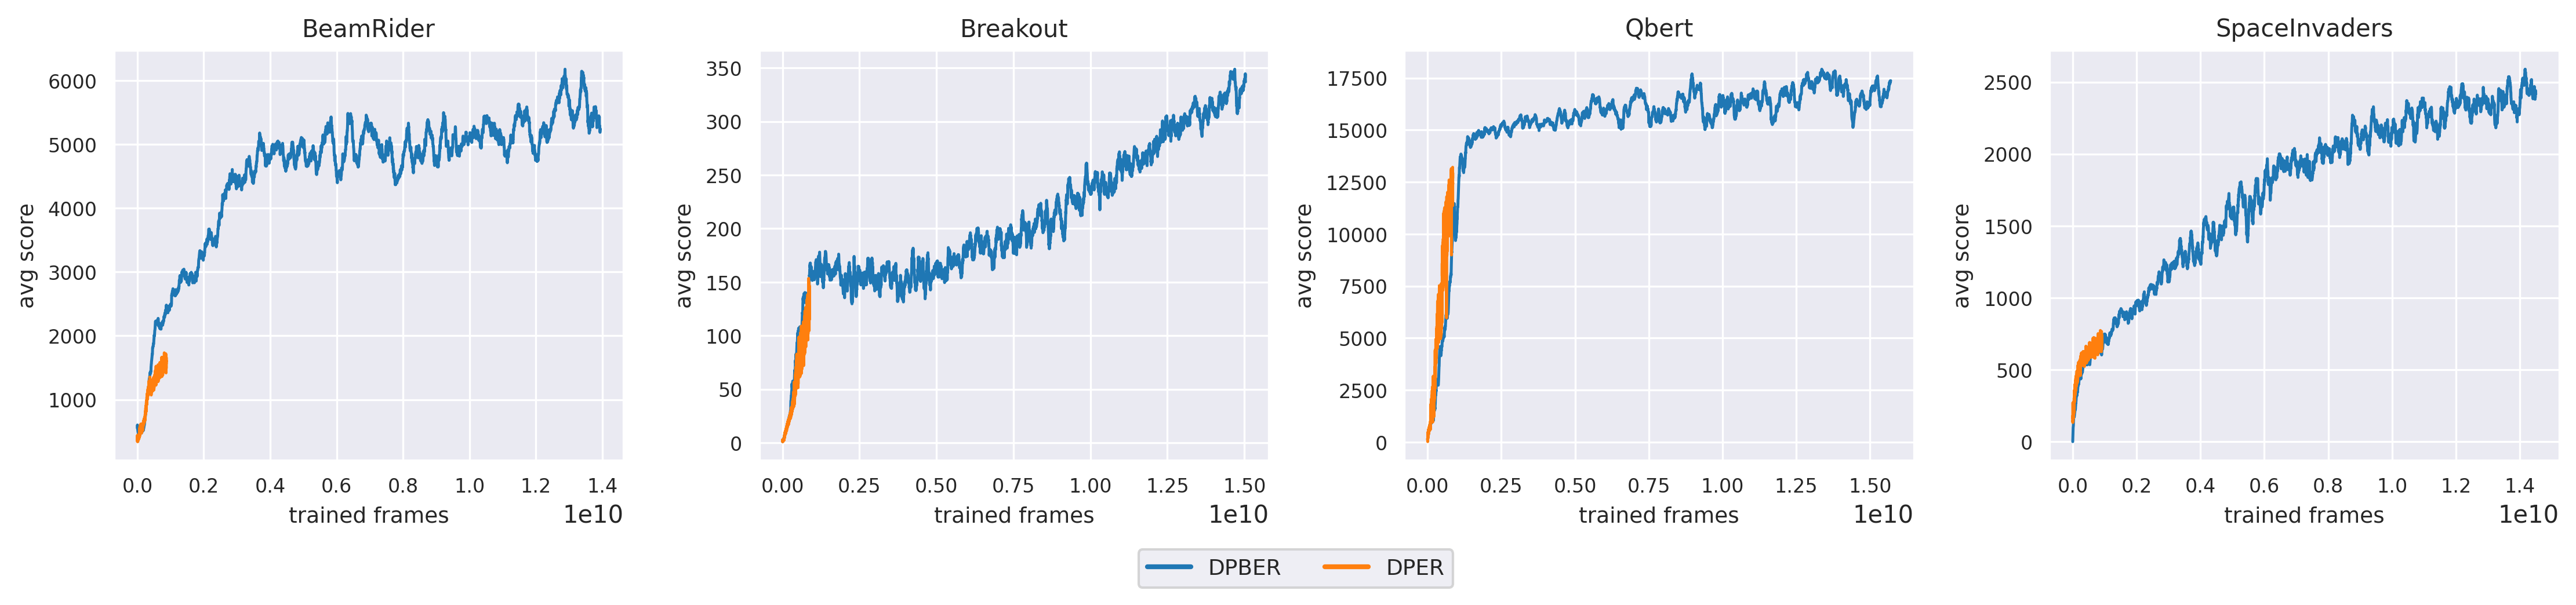

In [24]:
data_df = pd.read_csv(data_path)
data_df = data_df[data_df["env"].isin(["BeamRider", "Breakout", "Qbert", "SpaceInvaders"])]
data_df = data_df[data_df["size"].isin([1, 32])]
# Filter the environments
data_df["time(h)"] = data_df["time_total_s"] / 3600
sampler = {env: data_df[data_df['env'] == env] for env in data_df['env'].unique()}
window_size = 12500

def compute_rolling_mean(data, window_size=0.5):
    data["time_group"] = (data["num_env_steps_trained"] // window_size) * window_size
    data["time_group"] = data["time_group"] * 4
    smoothed_data = data.groupby(["time_group", "buffer"])[["episode_reward_mean"]].mean().reset_index()
    return smoothed_data

smoothed_sampler = {env: compute_rolling_mean(data) for env, data in sampler.items()}

# Custom palette for the buffers
buffer_palette = {
    'DPBER': sns.color_palette("tab10")[0],
    'DPER': sns.color_palette("tab10")[1]
}

# Create a 6x4 grid for the plots
fig, axes = plt.subplots(1, 4, figsize=(15, 3), dpi=300)
axes = axes.reshape(-1)

# Calculate the rolling mean for each environment and then plot
for ax_n, env in enumerate(data_df['env'].unique()):
    data_env = data_df[data_df['env'] == env]
    smoothed_data_env = compute_rolling_mean(data_env)
    
    ax = sns.lineplot(x="time_group", y="episode_reward_mean", hue="buffer", data=smoothed_data_env, ax=axes[ax_n], palette=buffer_palette, linewidth=1.2)
    ax.set_title(env, fontsize=10)
    ax.set_xlabel("trained frames", fontsize=9)
    ax.set_ylabel("avg score", fontsize=9)
    ax.xaxis.set_tick_params(labelsize=8)
    ax.yaxis.set_tick_params(labelsize=8)
    
    # Remove the legend from the subplot
    ax.get_legend().remove()

# Hide any unused subplots
for ax_n in range(len(data_df['env'].unique()), len(axes)):
    axes[ax_n].axis('off')

# Create a fixed set of legend labels and their corresponding lines
fixed_legend_labels = ['DPBER', 'DPER']
fixed_legend_lines = [plt.Line2D([0], [0], color=buffer_palette[label], lw=2) for label in fixed_legend_labels]
fig.legend(fixed_legend_lines, fixed_legend_labels, loc="upper center", bbox_to_anchor=(0.5, -0.05), ncol=len(fixed_legend_labels), fontsize=9)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, bottom=0.1)
plt.show()

/tmp/ipykernel_27256/2175511051.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["time_group"] = (data["time(h)"] // window_size) * window_size
/tmp/ipykernel_27256/2175511051.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["time_group"] = (data["time(h)"] // window_size) * window_size
/tmp/ipykernel_27256/2175511051.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

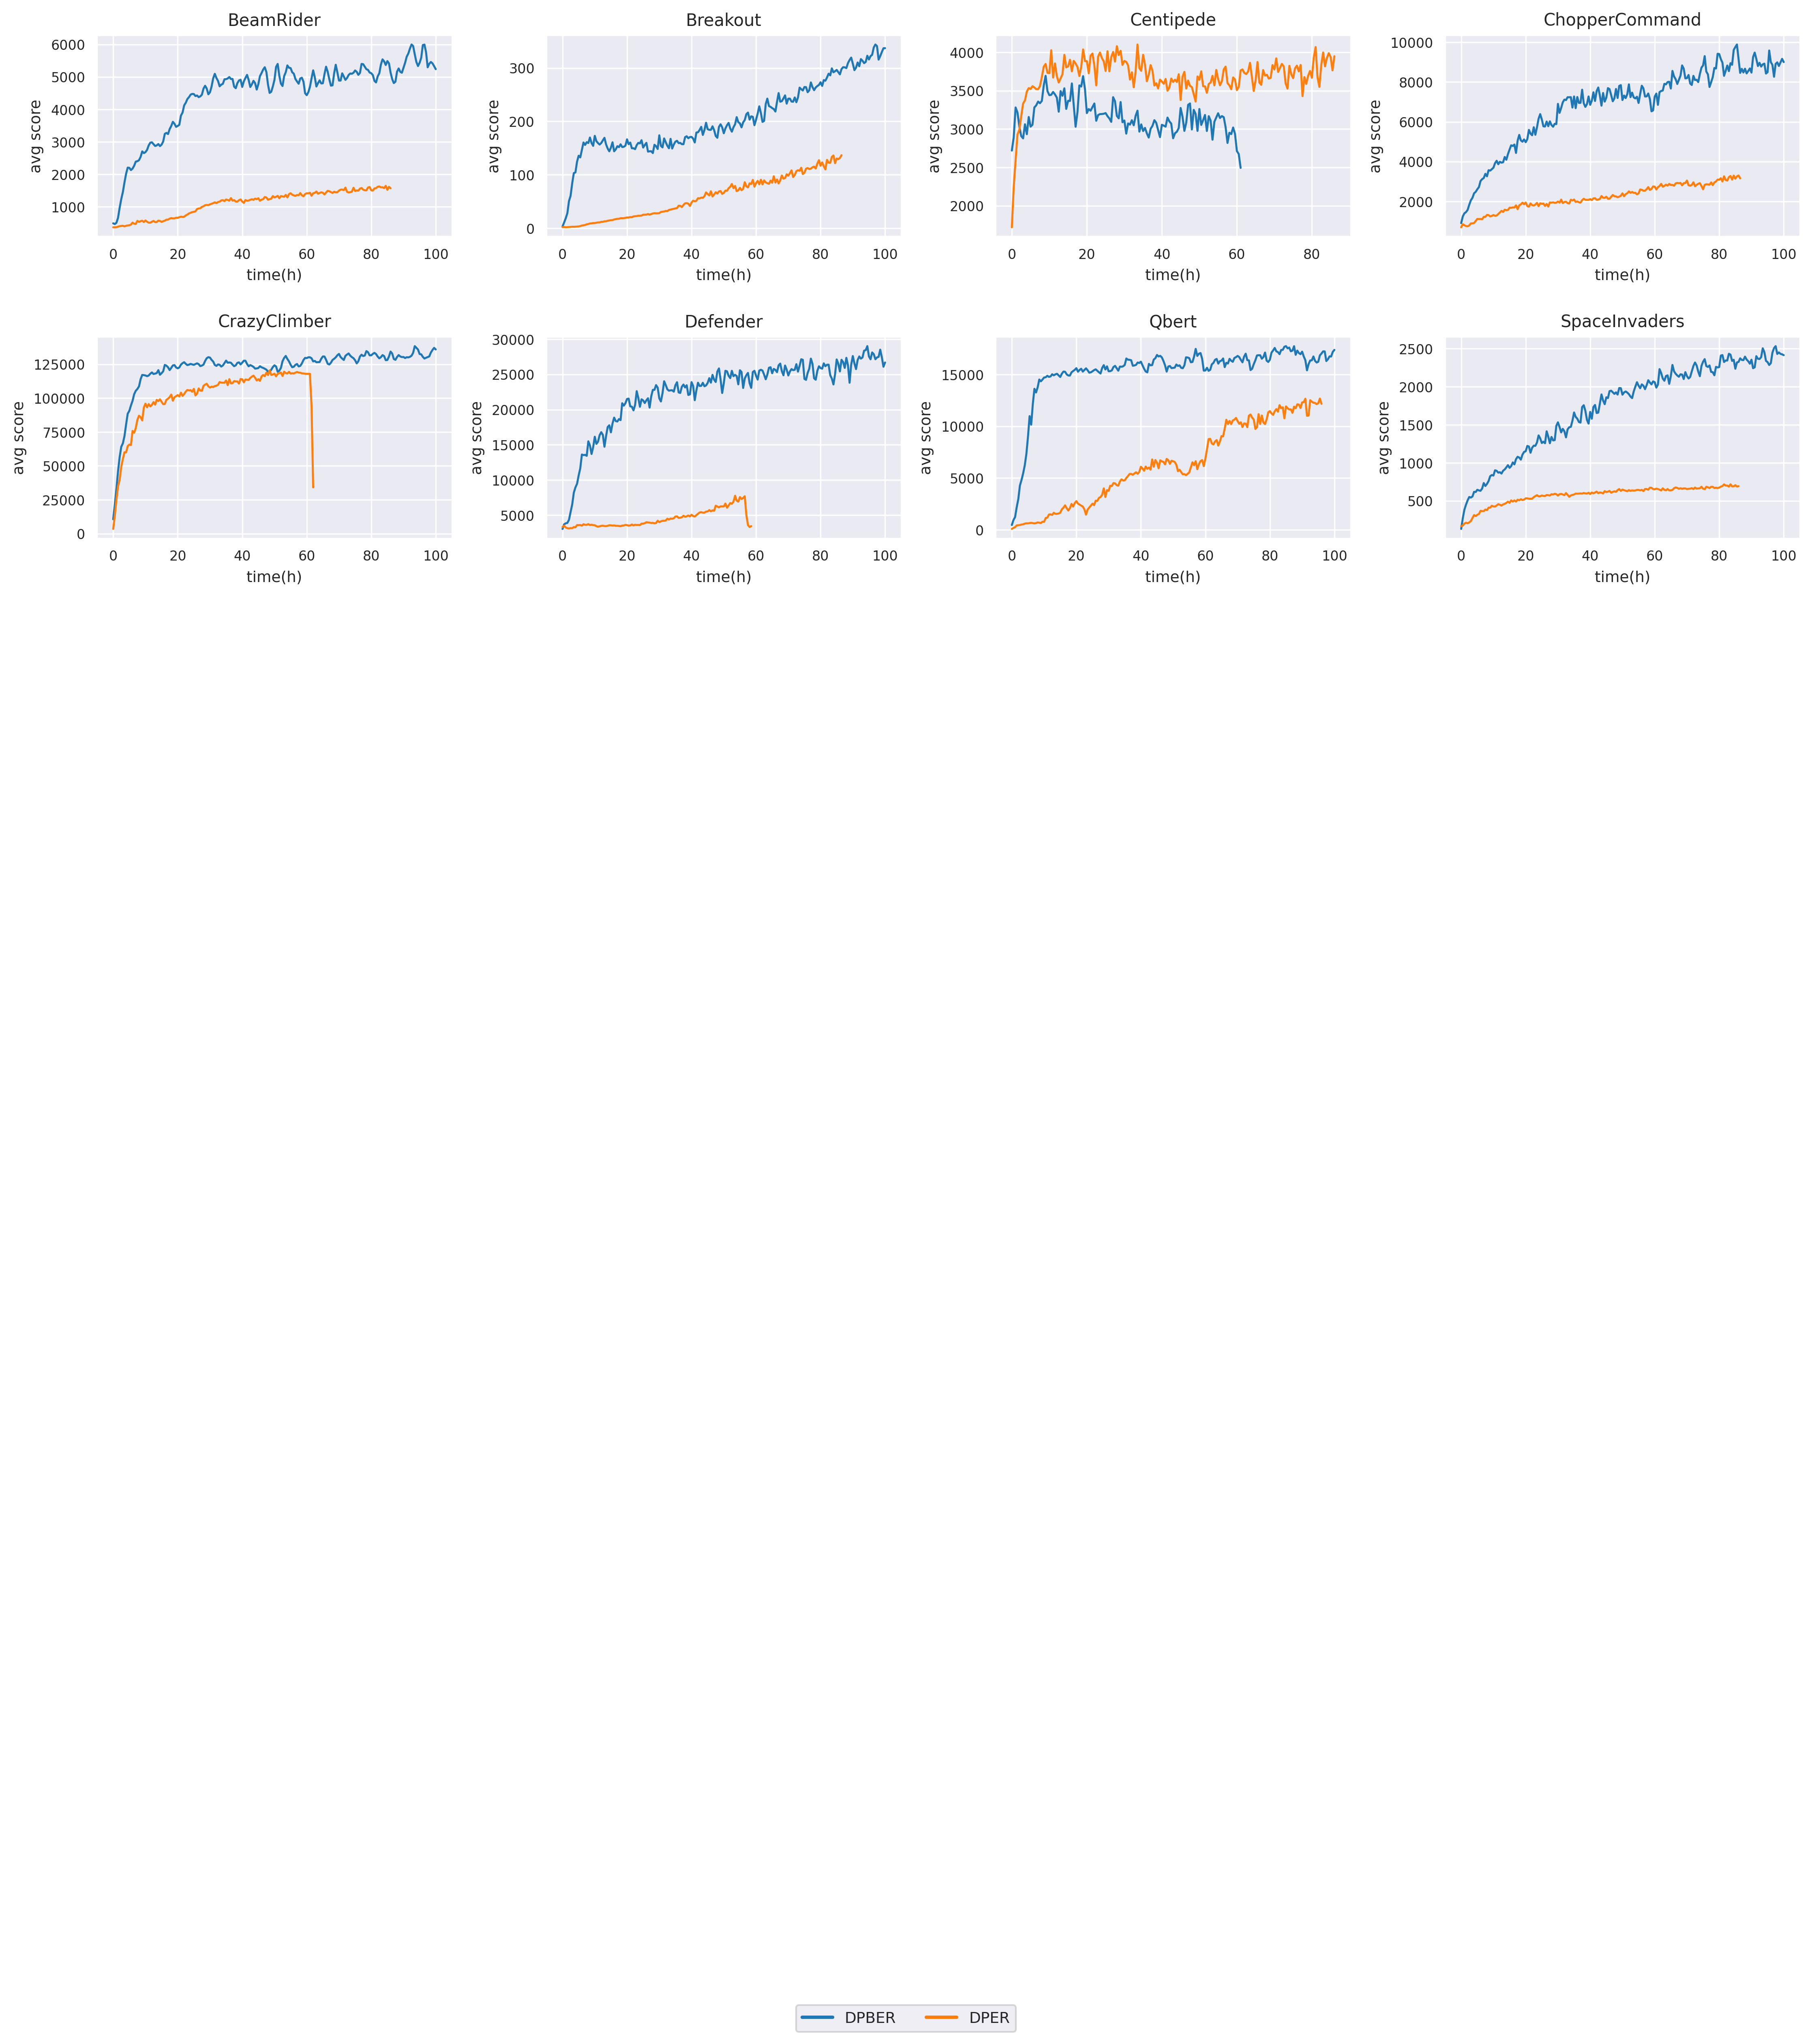

In [26]:
data_df = pd.read_csv(data_path)
data_df = data_df[data_df["size"].isin([1, 32])]
# Filter the environments
data_df["time(h)"] = data_df["time_total_s"] / 3600
sampler = {env: data_df[data_df['env'] == env] for env in data_df['env'].unique()}
window_size = 0.25

def compute_rolling_mean(data, window_size=0.5):
    data["time_group"] = (data["time(h)"] // window_size) * window_size
    smoothed_data = data.groupby(["time_group", "buffer"])["episode_reward_mean"].mean().reset_index()
    return smoothed_data

smoothed_sampler = {env: compute_rolling_mean(data) for env, data in sampler.items()}

# Custom palette for the buffers
buffer_palette = {
    'DPBER': sns.color_palette("tab10")[0],
    'DPER': sns.color_palette("tab10")[1]
}

# Create a 6x4 grid for the plots
fig, axes = plt.subplots(6, 4, figsize=(15, 16), dpi=300)
axes = axes.reshape(-1)

# Calculate the rolling mean for each environment and then plot
for ax_n, env in enumerate(data_df['env'].unique()):
    data_env = data_df[data_df['env'] == env]
    smoothed_data_env = compute_rolling_mean(data_env)
    
    ax = sns.lineplot(x="time_group", y="episode_reward_mean", hue="buffer", data=smoothed_data_env, ax=axes[ax_n], palette=buffer_palette, linewidth=1.2)
    ax.set_title(env, fontsize=10)
    ax.set_xlabel("time(h)", fontsize=9)
    ax.set_ylabel("avg score", fontsize=9)
    ax.xaxis.set_tick_params(labelsize=8)
    ax.yaxis.set_tick_params(labelsize=8)
    
    # Remove the legend from the subplot
    ax.get_legend().remove()

# Hide any unused subplots
for ax_n in range(len(data_df['env'].unique()), 24):
    axes[ax_n].axis('off')

# Create a fixed set of legend labels and their corresponding lines
fixed_legend_labels = ['DPBER', 'DPER']
fixed_legend_lines = [plt.Line2D([0], [0], color=buffer_palette[label], lw=2) for label in fixed_legend_labels]
fig.legend(fixed_legend_lines, fixed_legend_labels, loc="upper center", bbox_to_anchor=(0.5, -0.03), ncol=len(fixed_legend_labels), fontsize=9)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, bottom=0.1)
plt.show()

In [ ]:
data_df = pd.read_csv(data_path)
data_df = data_df[data_df["size"].isin([1, 32])]
# Filter the environments
data_df["time(h)"] = data_df["time_total_s"] / 3600
sampler = {env: data_df[data_df['env'] == env] for env in data_df['env'].unique()}
window_size = 12500

def compute_rolling_mean(data, window_size=0.5):
    data["time_group"] = (data["num_env_steps_sampled"] // window_size) * window_size
    data["time_group"] = data["time_group"] * 4
    smoothed_data = data.groupby(["time_group", "buffer"])[["episode_reward_mean"]].mean().reset_index()
    return smoothed_data

smoothed_sampler = {env: compute_rolling_mean(data) for env, data in sampler.items()}

# Custom palette for the buffers
buffer_palette = {
    'DPBER': sns.color_palette("tab10")[0],
    'DPER': sns.color_palette("tab10")[1]
}

# Create a 6x4 grid for the plots
fig, axes = plt.subplots(6, 4, figsize=(15, 16), dpi=300)
axes = axes.reshape(-1)

# Calculate the rolling mean for each environment and then plot
for ax_n, env in enumerate(data_df['env'].unique()):
    data_env = data_df[data_df['env'] == env]
    smoothed_data_env = compute_rolling_mean(data_env)
    
    ax = sns.lineplot(x="time_group", y="episode_reward_mean", hue="buffer", data=smoothed_data_env, ax=axes[ax_n], palette=buffer_palette, linewidth=1.2)
    ax.set_title(env, fontsize=10)
    ax.set_xlabel("sampled frames", fontsize=9)
    ax.set_ylabel("avg score", fontsize=9)
    ax.xaxis.set_tick_params(labelsize=8)
    ax.yaxis.set_tick_params(labelsize=8)
    
    # Remove the legend from the subplot
    ax.get_legend().remove()

# Hide any unused subplots
for ax_n in range(len(data_df['env'].unique()), 24):
    axes[ax_n].axis('off')

# Create a fixed set of legend labels and their corresponding lines
fixed_legend_labels = ['DPBER', 'DPER']
fixed_legend_lines = [plt.Line2D([0], [0], color=buffer_palette[label], lw=2) for label in fixed_legend_labels]
fig.legend(fixed_legend_lines, fixed_legend_labels, loc="upper center", bbox_to_anchor=(0.5, -0.03), ncol=len(fixed_legend_labels), fontsize=9)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, bottom=0.1)
plt.show()

In [ ]:
data_df = pd.read_csv(data_path)
data_df = data_df[data_df["size"].isin([1, 32])]
# Filter the environments
data_df["time(h)"] = data_df["time_total_s"] / 3600
sampler = {env: data_df[data_df['env'] == env] for env in data_df['env'].unique()}
window_size = 12500

def compute_rolling_mean(data, window_size=0.5):
    data["time_group"] = (data["num_env_steps_trained"] // window_size) * window_size
    data["time_group"] = data["time_group"] * 4
    smoothed_data = data.groupby(["time_group", "buffer"])[["episode_reward_mean"]].mean().reset_index()
    return smoothed_data

smoothed_sampler = {env: compute_rolling_mean(data) for env, data in sampler.items()}

# Custom palette for the buffers
buffer_palette = {
    'DPBER': sns.color_palette("tab10")[0],
    'DPER': sns.color_palette("tab10")[1]
}

# Create a 6x4 grid for the plots
fig, axes = plt.subplots(6, 4, figsize=(15, 16), dpi=300)
axes = axes.reshape(-1)

# Calculate the rolling mean for each environment and then plot
for ax_n, env in enumerate(data_df['env'].unique()):
    data_env = data_df[data_df['env'] == env]
    smoothed_data_env = compute_rolling_mean(data_env)
    
    ax = sns.lineplot(x="time_group", y="episode_reward_mean", hue="buffer", data=smoothed_data_env, ax=axes[ax_n], palette=buffer_palette, linewidth=1.2)
    ax.set_title(env, fontsize=10)
    ax.set_xlabel("trained frames", fontsize=9)
    ax.set_ylabel("avg score", fontsize=9)
    ax.xaxis.set_tick_params(labelsize=8)
    ax.yaxis.set_tick_params(labelsize=8)
    
    # Remove the legend from the subplot
    ax.get_legend().remove()

# Hide any unused subplots
for ax_n in range(len(data_df['env'].unique()), 24):
    axes[ax_n].axis('off')

# Create a fixed set of legend labels and their corresponding lines
fixed_legend_labels = ['DPBER', 'DPER']
fixed_legend_lines = [plt.Line2D([0], [0], color=buffer_palette[label], lw=2) for label in fixed_legend_labels]
fig.legend(fixed_legend_lines, fixed_legend_labels, loc="upper center", bbox_to_anchor=(0.5, -0.03), ncol=len(fixed_legend_labels), fontsize=9)

plt.tight_layout()
plt.subplots_adjust(hspace=0.5, bottom=0.1)
plt.show()

In [ ]:
data_df = pd.read_csv(data_path)
data_df = data_df[data_df["size"].isin([1, 32])]
n = 5
window_size_hours = 0.25
data_df["time(h)"] = data_df["time_total_s"] / 3600

# 2. Define helper functions
def apply_offsets_to_data(data):
    recommended_offsets = {
        'Boxing': 20,
        'Pong': 21,
        'FishingDerby': 100,
        'Frostbite': 5,
        'Enduro': 10,
        'Q*bert': 0
    }
    for env, min_reward in data.groupby('env')['episode_reward_mean'].min().items():
        if env not in recommended_offsets and min_reward < 0:
            recommended_offsets[env] = abs(min_reward) + 1
    data['episode_reward_mean'] = data.apply(lambda row: row['episode_reward_mean'] + recommended_offsets.get(row['env'], 0), axis=1)
    return data

def compute_interval_mean_with_env(env_data):
    env_name = env_data['env'].iloc[0]
    bins = list(np.arange(0, env_data["time(h)"].max() + window_size_hours, window_size_hours))
    env_data["time_interval"] = pd.cut(env_data["time(h)"], bins, labels=bins[:-1], right=False)
    numeric_cols = env_data.select_dtypes(include=[np.number]).columns.tolist()
    interval_data = env_data.groupby('time_interval')[numeric_cols].mean().reset_index()
    interval_data['env'] = env_name
    return interval_data

def compute_avg_reward_last_episodes(env_name, data1, data2, n):
    last_rewards1 = data1[data1['env'] == env_name]['episode_reward_mean'].tail(n).values
    last_rewards2 = data2[data2['env'] == env_name]['episode_reward_mean'].tail(n).values
    avg_reward1 = last_rewards1.mean()
    avg_reward2 = last_rewards2.mean()
    return avg_reward1, avg_reward2

def compute_T_save_for_env(env_name, data1, data2):
    rewards1 = data1[data1['env'] == env_name]['episode_reward_mean'].values
    rewards2 = data2[data2['env'] == env_name]['episode_reward_mean'].values
    if len(rewards1) == 0 or len(rewards2) == 0:
        return None
    times1 = data1[data1['env'] == env_name]['time(h)'].values
    times2 = data2[data2['env'] == env_name]['time(h)'].values
    time_diff_ratios = []
    max_reward = max(rewards1.max(), rewards2.max())
    reward_samples = np.linspace(0, max_reward, 51)
    for target_reward in reward_samples:
        time1 = next((times1[i] for i, r in enumerate(rewards1) if r >= target_reward), None)
        time2 = next((times2[i] for i, r in enumerate(rewards2) if r >= target_reward), None)
        if time1 is not None and time2 is not None:
            time_diff_ratio = (time1 - time2) / time1
            time_diff_ratios.append(time_diff_ratio)
    return np.median(time_diff_ratios) if time_diff_ratios else None

# 3. Main data processing and analysis steps
# Sort data by time
data_df_sorted = data_df.sort_values(by=["env", "time(h)"])
# Apply offsets to the data
data_df_sorted = apply_offsets_to_data(data_df_sorted)

# Split sorted data for ER vs. BER and PER vs. PBER
er_data_sorted = data_df_sorted[data_df_sorted['buffer'] == 'DPER']
ber_data_sorted = data_df_sorted[data_df_sorted['buffer'] == 'DPBER']

# Compute interval mean for each buffer type and environment using sorted data
er_interval_data_sorted = pd.concat([compute_interval_mean_with_env(er_data_sorted[er_data_sorted['env'] == env]) for env in er_data_sorted['env'].unique()])
ber_interval_data_sorted = pd.concat([compute_interval_mean_with_env(ber_data_sorted[ber_data_sorted['env'] == env]) for env in ber_data_sorted['env'].unique()])

# Compute metrics for ER vs. BER and PER vs. PBER using sorted data
results_sorted = []
for env in data_df_sorted['env'].unique():
    R_improve_er_ber = (ber_interval_data_sorted[ber_interval_data_sorted['env'] == env]["episode_reward_mean"].median() - er_interval_data_sorted[er_interval_data_sorted['env'] == env]["episode_reward_mean"].median()) / ber_interval_data_sorted[ber_interval_data_sorted['env'] == env]["episode_reward_mean"].median()

    T_save_er_ber = compute_T_save_for_env(env, er_data_sorted, ber_data_sorted)
    
    avg_er_reward, avg_ber_reward = compute_avg_reward_last_episodes(env, er_data_sorted, ber_data_sorted, n)
    
    improvement_percentage_er_ber = ((avg_ber_reward - avg_er_reward) / avg_er_reward)  if avg_er_reward != 0 else np.nan
    
    results_sorted.append({
        'Environment': env,
        'R_improve_DPER_DPBER': R_improve_er_ber,
        'T_save_DPER_DPBER': T_save_er_ber,
        'R_last_DPER_DPBER': improvement_percentage_er_ber,
    })

# Convert results to a DataFrame and compute mean values
result_df_sorted = pd.DataFrame(results_sorted).set_index('Environment')

# 4. Calculate the average rates for num_env_steps_sampled and num_env_steps_trained per env and buffer
data_df['sampled/s'] = data_df['num_env_steps_sampled'] / data_df['time_total_s']
data_df['trained/s'] = data_df['num_env_steps_trained'] / data_df['time_total_s']

# Group by env and buffer and calculate mean rates
grouped_rates = data_df.groupby(['env', 'buffer'])[['sampled/s', 'trained/s']].mean().reset_index()

# Separate the rates for DPER and DPBER
dper_rates = grouped_rates[grouped_rates['buffer'] == 'DPER'].set_index('env')[['sampled/s', 'trained/s']]
dpber_rates = grouped_rates[grouped_rates['buffer'] == 'DPBER'].set_index('env')[['sampled/s', 'trained/s']]

# Calculate the ratio of DPBER to DPER for sampled and trained rates
rate_ratios = dpber_rates / dper_rates
rate_ratios = rate_ratios.reset_index()

# Append rate ratios to result_df_sorted
result_df_combined = result_df_sorted.merge(rate_ratios, left_index=True, right_on='env').set_index('env')
result_df_combined

In [8]:
result_df_combined.loc[["BeamRider", "Breakout", "Qbert", "SpaceInvaders"]].mean()

NameError: name 'result_df_combined' is not defined

In [9]:
def remove_outliers_and_compute_mean(column_data):
    # Compute IQR
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    
    # Filter out outliers
    filtered_data = column_data[~((column_data < (Q1 - IQR)) | (column_data > (Q3 + IQR)))]
    
    # Compute mean
    return filtered_data.mean()

# Apply the function on each column
filtered_means = result_df_combined.apply(remove_outliers_and_compute_mean)
filtered_means.name = "Normalized"
filtered_means_df = pd.DataFrame(filtered_means).T
filtered_means_df = pd.concat([result_df_combined, filtered_means_df])
filtered_means_df

NameError: name 'result_df_combined' is not defined

In [10]:
filtered_means.to_dict()

NameError: name 'filtered_means' is not defined

In [11]:
def generate_refined_latex_table_fixed(df):
    header = "\\begin{tabular}{" + "l" + "c"*df.shape[1] + "}\n\\toprule"
    
    # Headers with formatted names
    column_names = []
    for col in df.columns:
        if "_" in col:
            formatted_name = "$" + col.split("_")[0] + "_{" + col.split("_")[1] + "}$"
        else:
            formatted_name = col
        column_names.append(formatted_name)
    
    rows = [" & \\multicolumn{3}{c}{Metrics} & \\multicolumn{2}{c}{Frames} \\\\ \\cmidrule(lr){2-4} \\cmidrule(lr){5-6}"]
    rows.append(" & ".join([""] + column_names) + " \\\ \midrule")
    
    for index, row in df.iterrows():
        rows.append("{} & {}".format(index, " & ".join(["{:.4f}".format(val) for val in row.values])) + " \\\ ")
    
    footer = "\\bottomrule\n\\end{tabular}"
    return header + "\n" + "\n".join(rows) + "\n" + footer

# Generate the LaTeX table using the fixed function
latex_table_fixed = generate_refined_latex_table_fixed(filtered_means_df)
print(latex_table_fixed)

NameError: name 'filtered_means_df' is not defined